## Pose Estimation
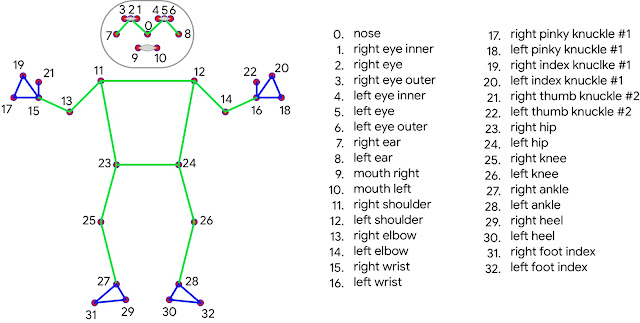

In [2]:
import cv2 as cv
import mediapipe as mp
import time

In [ ]:
cap = cv.VideoCapture(0)
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils
pTime = 0

while True:
    success , img = cap.read()
    imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    print("Landmarks : ",results.pose_landmarks)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(img,results.pose_landmarks,mpPose.POSE_CONNECTIONS)
        
        for id , lm in enumerate(results.pose_landmarks.landmark):
            h, w, c = img.shape
            print("ID : ",id ,"\nLandmark : ", lm)
            
            cx , cy = int(lm.x*w) , int(lm.y*h)
            cv.circle(img, (cx , cy) , 5 , (255,0,255) , cv.FILLED)
    
    
    cTime = time.time()
    fbs = 1/(cTime - pTime)
    pTime = cTime
    
    cv.putText(img, str(int(fbs)) , (70,50) , cv.FONT_HERSHEY_PLAIN , 3 ,(255,0,0) , 3)
    
    cv.imshow("Image" , img )
    cv.waitKey(1)

### Module

In [ ]:
import cv2 as cv
import mediapipe as mp
import time

In [8]:
class poseDetector():
    def __init__(self, mode = False , upperBody = False , smooth = True , detectionConf = 0.5 , trackConf = 0.5):
        self.mode = mode
        self.upperBody = upperBody
        self.smooth = smooth
        self.detectionConf = detectionConf
        self.trackConf = trackConf
        
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode , self.upperBody ,1, self.smooth , self.detectionConf,self.trackConf)
        self.mpDraw = mp.solutions.drawing_utils
        
    def findPose(self,img, draw = True):
        imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        self.results = self.pose.process(imgRGB)
        
        if self.results.pose_landmarks and draw:
            self.mpDraw.draw_landmarks(img,self.results.pose_landmarks,self.mpPose.POSE_CONNECTIONS)
        return img
    
    
    def findPosition(self,img,draw = True):
        lmList = []
        
        if self.results.pose_landmarks: 
            for id , lm in enumerate(self.results.pose_landmarks.landmark):
                h, w, c = img.shape
                print("ID : ",id ,"\nLandmark : ", lm)
                
                cx , cy = int(lm.x*w) , int(lm.y*h)
                if draw : cv.circle(img, (cx , cy) , 5 , (255,0,255) , cv.FILLED)
                
                lmList.append([id , cx , cy])
                
        return lmList

In [ ]:
cap = cv.VideoCapture(0)
pTime = 0
detector = poseDetector()
while True:
    success , img = cap.read()
    img = detector.findPose(img)
    lmList = detector.findPosition(img)
    
    cTime = time.time()
    fbs = 1/(cTime - pTime)
    pTime = cTime

    cv.putText(img, str(int(fbs)) , (70,50) , cv.FONT_HERSHEY_PLAIN , 3 ,(255,0,0) , 3)

    cv.imshow("Image" , img )
    cv.waitKey(1)

: 